<a href="https://colab.research.google.com/github/santiagoq21/ProyectoDS_Parte_I_Santiago_Quagliotti/blob/main/ProyectoDSParteI_Quagliotti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - Visualizaciones en Python
# Primera Entrega
# Archivo: ProyectoDSParteI_Quagliotti.ipynb


---
# 📌 Abstract
En el presente trabajo, se utiliza el Textile Company Dataset disponible en Kaggle como base para un análisis exploratorio de datos con foco en la industria textil, con el objetivo de identificar patrones de rentabilidad, eficiencia productiva y comportamiento de costos frente a ventas. El dataset incluye información anual por producto tales como ventas totales, manufactura, remanentes e indicadores de ganancia o pérdida, lo cual permite examinar tanto el desempeño global de la empresa como comparar productos específicos.


#❓ Preguntas / Hipótesis de interés
1. ¿Qué productos están generando ganancias consistentes y cuáles presentan pérdidas recurrentes?

2. ¿Cómo se relacionan los costos de manufactura con las ventas para distintos productos?


3. ¿Cómo ha variado la rentabilidad a lo largo del tiempo (años)?


# Objetivo del Proyecto
Para abordar estas cuestiones se llevarán a cabo visualizaciones univariadas, bivariadas y multivariadas, además de análisis descriptivos numéricos como medias, medianas, desviaciones estándar y correlaciones entre variables relevantes. Se identificará también la presencia de valores faltantes, outliers y se realizará limpieza de datos para asegurar que los resultados sean consistentes.

Se espera que el análisis aporte conocimiento útil para la toma de decisiones, como determinar qué productos mantener o descartar, optimizar costos de manufactura, y mejorar la gestión del inventario, con miras a mejorar la rentabilidad global de la empresa textil. Aunque este enfoque es exploratorio, los hallazgos podrían servir de base para futuras tareas predictivas o de modelado avanzado.




# 📊 Visualizaciones y Análisis

In [20]:
# 1. Cargar dataset directamente desde GitHub y Ver las primeras filas

url = "https://raw.githubusercontent.com/santiagoq21/ProyectoDS_Parte_I_Santiago_Quagliotti/refs/heads/main/data/textile_company_data_10000.csv"
df = pd.read_csv(url)

df.head()

,Year,Product Name,Profit,Loss,Total Sale,Total Manufacturing,Remaining Products,Total No of Workers,Salary of Workers,Raw Material Cost,Production Cost
0,2022,Lehenga,0,28862.0,50301,50301,132,295,1475000,41263,19900
1,2023,Lehenga,97331,0.0,194662,97331,65,224,1120000,40165,22465
2,2020,Pants,78326,0.0,156652,78326,80,144,720000,24466,15565
3,2022,Dupatta,97670,0.0,195340,97670,42,255,1275000,31980,13641
4,2022,Lehenga,30782,0.0,61564,30782,82,283,1415000,17542,27438


In [21]:
# 2. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Missing Values

In [22]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


# 📊 1. Univariados

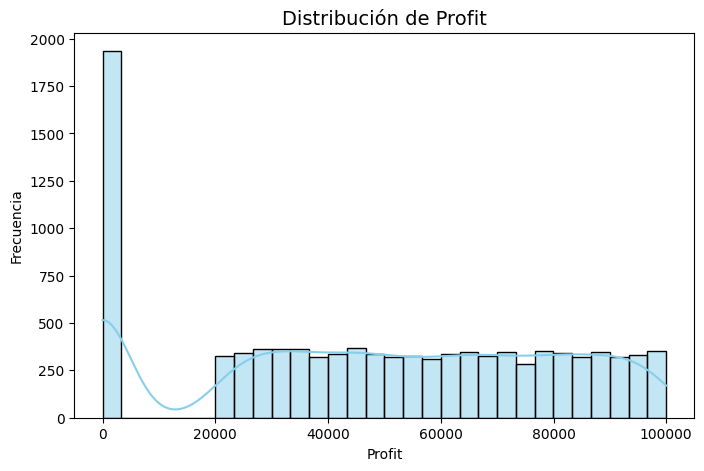

In [23]:
 #1) Histograma de Profit

plt.figure(figsize=(8,5))
sns.histplot(df["Profit"], bins=30, kde=True, color="skyblue")
plt.title("Distribución de Profit", fontsize=14)
plt.xlabel("Profit")
plt.ylabel("Frecuencia")
plt.show()


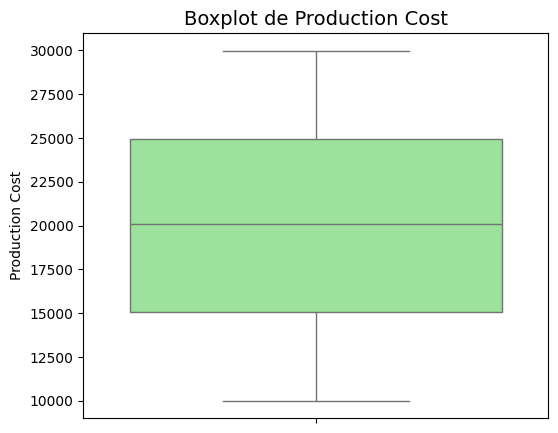

In [24]:
# 2) Boxplot de Production Cost

plt.figure(figsize=(6,5))
sns.boxplot(y=df["Production Cost"], color="lightgreen")
plt.title("Boxplot de Production Cost", fontsize=14)
plt.ylabel("Production Cost")
plt.show()

/tmp/ipython-input-2878385543.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Product Name", data=df, palette="pastel")


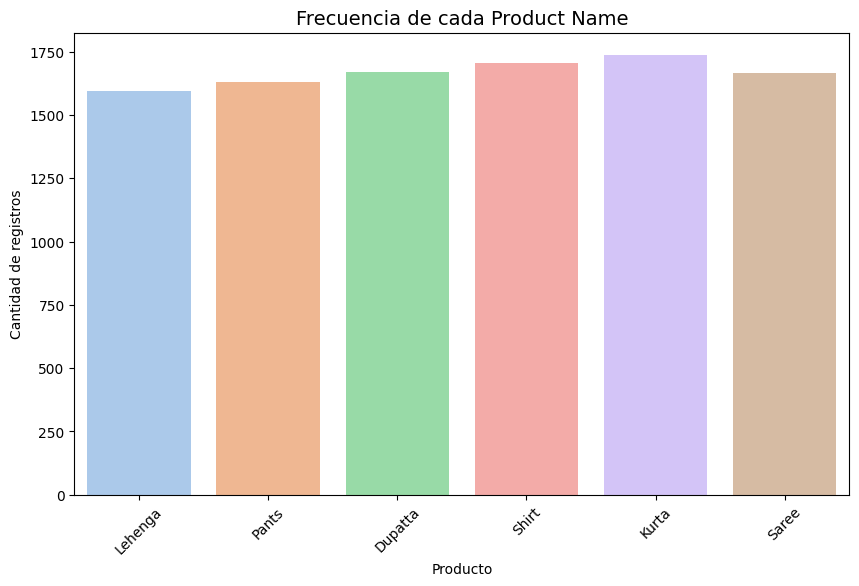

In [25]:
# 3) Conteo de productos (Product Name)

plt.figure(figsize=(10,6))
sns.countplot(x="Product Name", data=df, palette="pastel")
plt.title("Frecuencia de cada Product Name", fontsize=14)
plt.xlabel("Producto")
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=45)
plt.show()

# 📊 2. Bivariados

---



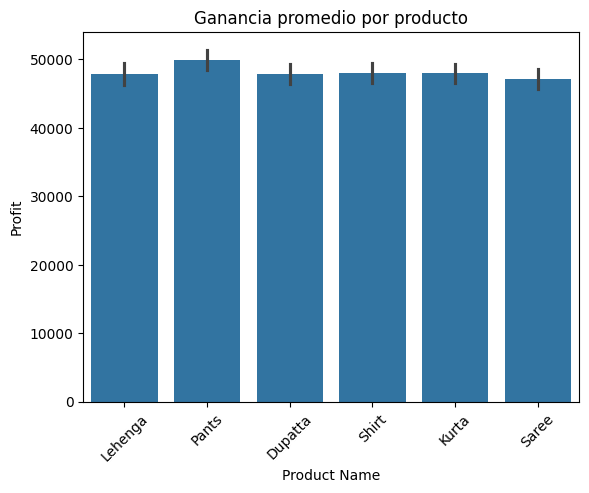

In [26]:
#1) Ganancia promedio por producto (Profit).

sns.barplot(x="Product Name", y="Profit", data=df, estimator="mean")
plt.title("Ganancia promedio por producto")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2046386545.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Product Name", y="Profit", data=df, palette="pastel")


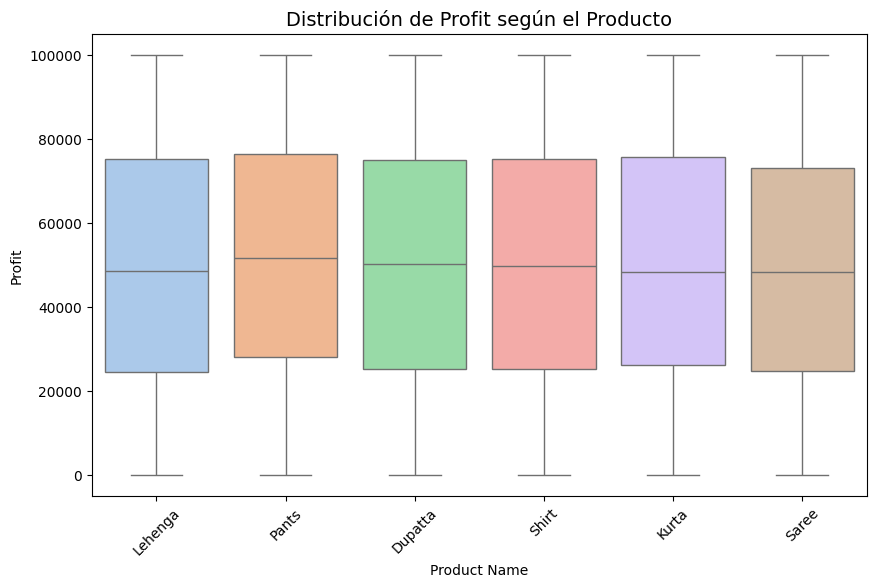

In [27]:
# 2) Profit por Product Name

plt.figure(figsize=(10,6))
sns.boxplot(x="Product Name", y="Profit", data=df, palette="pastel")
plt.title("Distribución de Profit según el Producto", fontsize=14)
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1208801837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year", y="Total Sale", data=df, estimator="sum", palette="viridis")


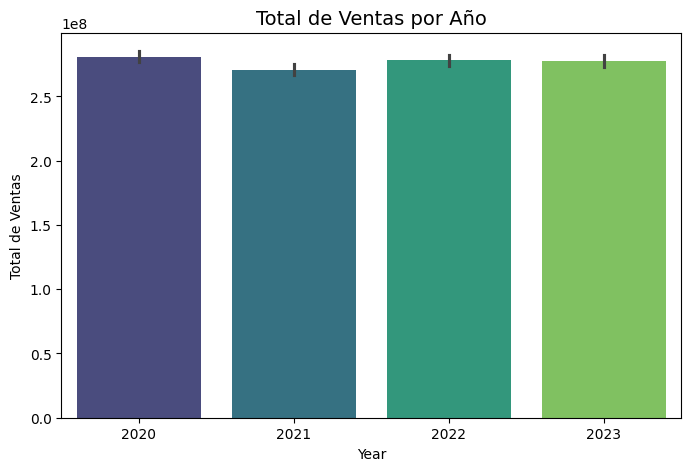

In [28]:
# 3) Evolución de ventas por Año

plt.figure(figsize=(8,5))
sns.barplot(x="Year", y="Total Sale", data=df, estimator="sum", palette="viridis")
plt.title("Total de Ventas por Año", fontsize=14)
plt.ylabel("Total de Ventas")
plt.show()

# 📊 3. Multivariados

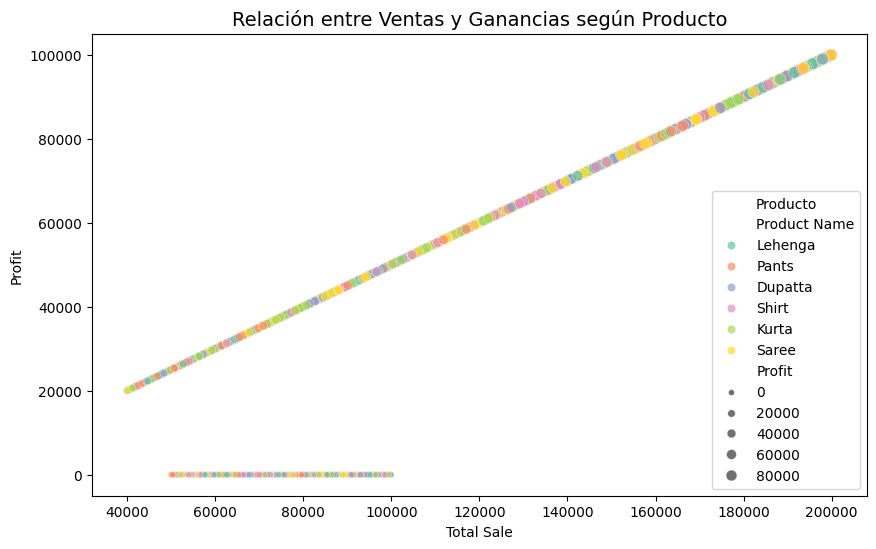

In [29]:
# 1) Ventas vs Ganancias por Producto
# =============================
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total Sale", y="Profit", hue="Product Name", size="Profit", data=df, palette="Set2", alpha=0.7)
plt.title("Relación entre Ventas y Ganancias según Producto", fontsize=14)
plt.xlabel("Total Sale")
plt.ylabel("Profit")
plt.legend(title="Producto")
plt.show()

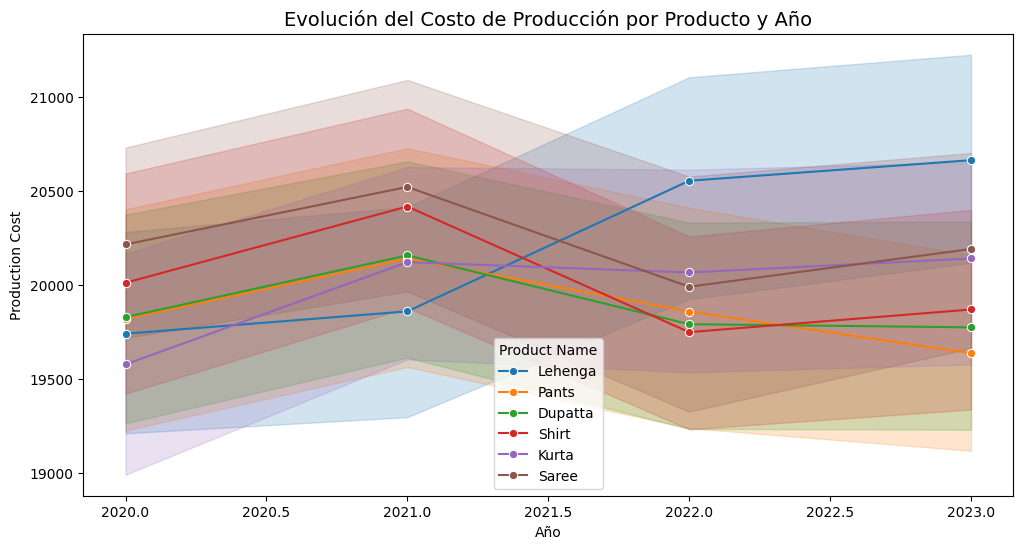

In [30]:
# 2) Evolución de Costos de Producción por Año y Producto
# =============================
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Production Cost", hue="Product Name", data=df, marker="o")
plt.title("Evolución del Costo de Producción por Producto y Año", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Production Cost")
plt.show()

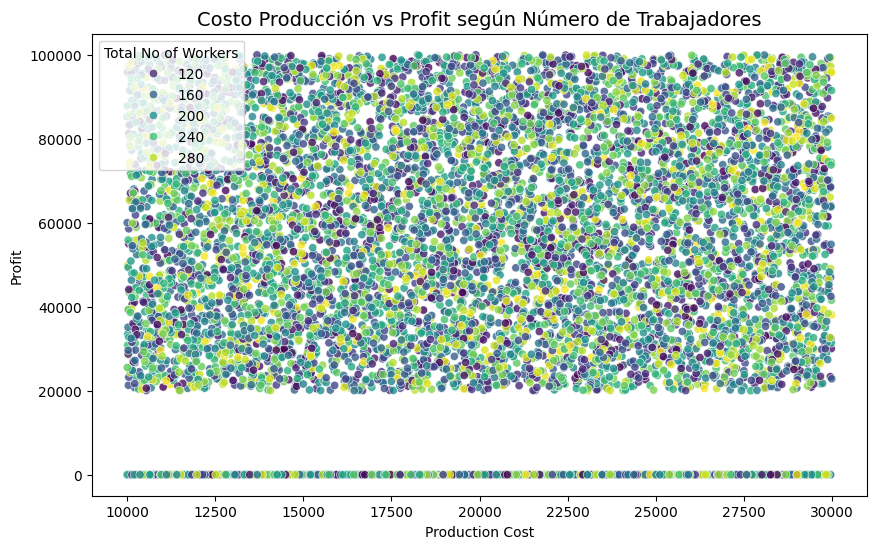

In [31]:
# 3) Relación Costo Total vs Profit, según Número de Trabajadores
# =============================
plt.figure(figsize=(10,6))
sns.scatterplot(x="Production Cost", y="Profit", hue="Total No of Workers", data=df, palette="viridis", alpha=0.8)
plt.title("Costo Producción vs Profit según Número de Trabajadores", fontsize=14)
plt.xlabel("Production Cost")
plt.ylabel("Profit")
plt.show()

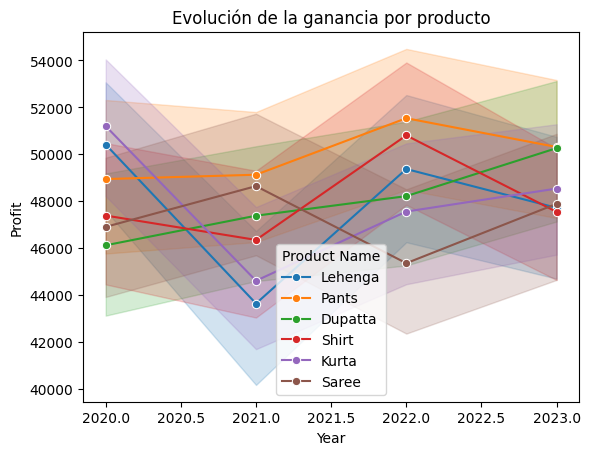

In [32]:
# 4) Evolución de la ganancia por producto

sns.lineplot(x="Year", y="Profit", hue="Product Name", data=df, marker="o")
plt.title("Evolución de la ganancia por producto")
plt.show()


📌 **Conclusiones preliminares**

**Rentabilidad y ventas**

Existe una relación positiva entre el nivel de ventas (Total Sale) y las ganancias (Profit), aunque con variaciones según el producto.

Algunos productos muestran un mejor desempeño en términos de rentabilidad, posicionándose como los más estratégicos para la empresa.

**Costos de producción**

El análisis de Production Cost evidencia dispersión en los valores, con la presencia de posibles outliers.

La evolución de los costos en el tiempo varía por producto, lo que indica la necesidad de un control más detallado para evitar aumentos que afecten los márgenes.

**Eficiencia en el uso de recursos**

La relación entre Costo Total, Profit y Total No of Workers sugiere que no siempre un mayor costo o más trabajadores se traduce en mayores beneficios.

Esto puede señalar ineficiencias en algunos procesos productivos.

**Comportamiento por productos**

La comparación de Profit por Product Name muestra diferencias marcadas entre productos.

Esto refuerza la importancia de identificar los productos más rentables y los que generan pérdidas recurrentes.

**Tendencia temporal**

El análisis por Year refleja fluctuaciones en ventas y costos.

Esto puede relacionarse con factores externos (mercado, precio de materias primas) o internos (capacidad productiva, eficiencia).

# Aplicar algun metodo de Outliers Detection

In [33]:
# Cantidad de valores perdidos por columna
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


,0


In [34]:
# Porcentaje de missing values
missing_percent = (df.isna().sum() / len(df)) * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)


,0


## Método del Rango Intercuartílico (IQR)

In [35]:
# Seleccionamos las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers_iqr = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtramos outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    if len(outliers) > 0:
        outliers_iqr[col] = len(outliers)

outliers_iqr

{'Loss': 1935}

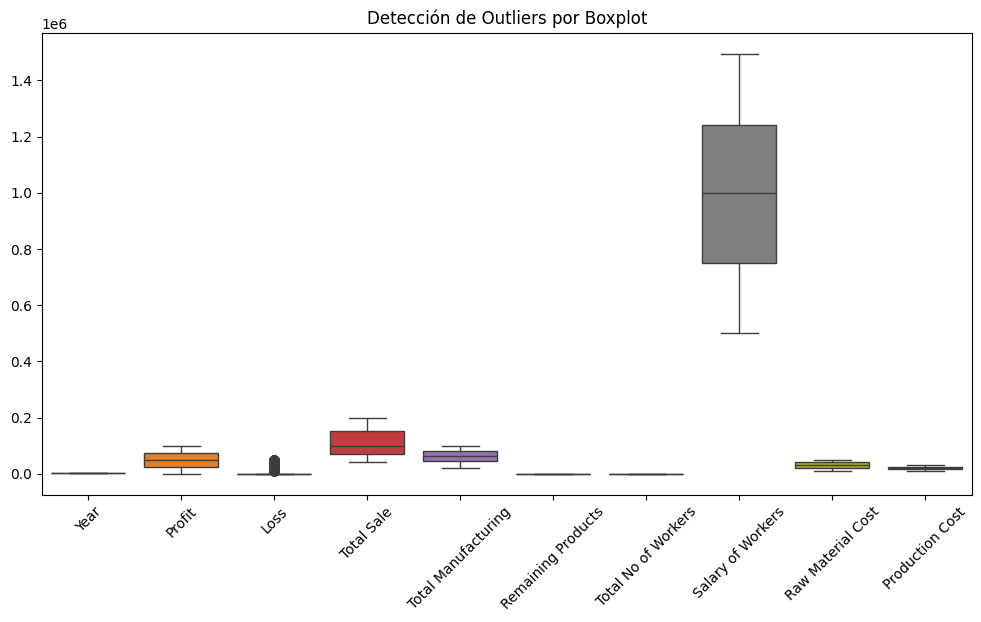

In [36]:
#Visualización con Boxplot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Detección de Outliers por Boxplot")
plt.show()